In [1]:
# widing my cells 
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### business understanding

* date - date of publication of the announcement;
* time - the time when the ad was published;
* geo_lat - Latitude
* geo_lon - Longitude
* region - Region of Russia. There are 85 subjects in the country in total.
* building_type - Facade type. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden
* object_type - Apartment type. 1 - Secondary real estate market; 2 - New building;
* level - Apartment floor
* levels - Number of storeys
* rooms - the number of living rooms. If the value is "-1", then it means "studio apartment"
* area - the total area of the apartment
* kitchen_area - Kitchen area
* price - Price. in rubles

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import functions as fs
import numpy as np
import re
import plotly.express as px
warnings.filterwarnings('ignore')
from time import sleep
from translate import Translator
%matplotlib inline
sns.set_theme(context = 'poster' , style = 'ticks' , palette = 'magma' , font_scale = 0.6 , rc = {'figure.figsize':[18 , 8]})

### Load DataSet into DataFrame

In [3]:
df1 = pd.read_csv('all_v2.csv')

In [4]:
df1.head(10)

price        date      time    geo_lat    geo_lon  region  building_type  \
0  6050000  2018-02-19  20:00:21  59.805808  30.376141    2661              1   
1  8650000  2018-02-27  12:04:54  55.683807  37.297405      81              3   
2  4000000  2018-02-28  15:44:00  56.295250  44.061637    2871              1   
3  1850000  2018-03-01  11:24:52  44.996132  39.074783    2843              4   
4  5450000  2018-03-01  17:42:43  55.918767  37.984642      81              3   
5  3300000  2018-03-02  21:18:42  55.908253  37.726448      81              1   
6  4704280  2018-03-04  12:35:25  55.621097  37.431002       3              2   
7  3600000  2018-03-04  20:52:38  59.875526  30.395457    2661              1   
8  3390000  2018-03-05  07:07:05  53.195031  50.106952    3106              2   
9  2800000  2018-03-06  09:57:10  55.736972  38.846457      81              1   

   level  levels  rooms  area  kitchen_area  object_type  
0      8      10      3  82.6          10.8            1  
1      5      24      2  69.1          12.0            1  
2      5       9      3  66.0          10.0            1  
3     12      16      2  38.0           5.0           11  
4     13      14      2  60.0          10.0            1  
5      4       5      1  32.0           6.0            1  
6      1      25      1  31.7           6.0           11  
7      2       5      1  31.1           6.0            1  
8      4      24      2  64.0          13.0           11  
9      9      10      2  55.0           8.0            1

#### Getting info about the dataset

In [5]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


###### info:
* 5477006 rows & 13 columns
* memory usage: 543.2+ MB
* dtypes: float64(4), int64(7), object(2)

### According to the data's volume we gonna take 50K row only

In [6]:
df = df1.sample(50000,random_state=2)
df

price        date      time    geo_lat    geo_lon  region  \
313199    4999999  2018-10-20  22:11:49  59.958459  30.215529    2661   
2437764   2150000  2019-08-23  16:39:54  45.072674  41.936996    2900   
4949072   8600000  2021-01-21  18:39:45  59.939359  30.437068    2661   
4109465   5100000  2020-07-18  17:51:46  59.740478  30.569539    2661   
2187702   3470000  2019-07-11  12:21:25  56.324063  44.005391    2871   
...           ...         ...       ...        ...        ...     ...   
854954    7093280  2018-12-31  08:58:26  55.916540  37.710144      81   
3426694   3600000  2020-03-11  05:45:23  45.061372  38.962089    2843   
3867872  13500000  2020-06-09  12:54:12  55.747042  37.863328      81   
1197313   1470000  2019-02-21  07:20:04  49.935245  40.559080    2072   
4767435   4150000  2020-11-28  06:45:02  56.786544  60.651328    6171   

         building_type  level  levels  rooms   area  kitchen_area  object_type  
313199               3      8      13      1  36.00          7.20            1  
2437764              3      5       5      1  52.00         15.00            1  
4949072              2     11      22      1  37.10          9.80            1  
4109465              1      2       9      3  74.50          9.50            1  
2187702              2     11      26      2  54.00          8.00           11  
...                ...    ...     ...    ...    ...           ...          ...  
854954               1     11      25      3  68.80         12.40           11  
3426694              0     13      24      1  40.63         11.00            1  
3867872              1      1      16      3  72.00         10.00            1  
1197313              2      1       5      1  36.40          8.50            1  
4767435              2     24      25      2  48.11          8.87           11  

[50000 rows x 13 columns]

In [7]:
df.reset_index(inplace=True)
df.drop('index', axis=1,inplace=True)

## sample of data (head & tail)

In [8]:
df.head(4)

price        date      time    geo_lat    geo_lon  region  building_type  \
0  4999999  2018-10-20  22:11:49  59.958459  30.215529    2661              3   
1  2150000  2019-08-23  16:39:54  45.072674  41.936996    2900              3   
2  8600000  2021-01-21  18:39:45  59.939359  30.437068    2661              2   
3  5100000  2020-07-18  17:51:46  59.740478  30.569539    2661              1   

   level  levels  rooms  area  kitchen_area  object_type  
0      8      13      1  36.0           7.2            1  
1      5       5      1  52.0          15.0            1  
2     11      22      1  37.1           9.8            1  
3      2       9      3  74.5           9.5            1

In [9]:
df.tail(4)

price        date      time    geo_lat    geo_lon  region  \
49996   3600000  2020-03-11  05:45:23  45.061372  38.962089    2843   
49997  13500000  2020-06-09  12:54:12  55.747042  37.863328      81   
49998   1470000  2019-02-21  07:20:04  49.935245  40.559080    2072   
49999   4150000  2020-11-28  06:45:02  56.786544  60.651328    6171   

       building_type  level  levels  rooms   area  kitchen_area  object_type  
49996              0     13      24      1  40.63         11.00            1  
49997              1      1      16      3  72.00         10.00            1  
49998              2      1       5      1  36.40          8.50            1  
49999              2     24      25      2  48.11          8.87           11

### insert some invalid data just to get some errors

In [10]:
for col in df.columns:
    fs.random_value(df, col, np.random.randint(200, 1000), ['$%','?#','^&','$@'])

#### Getting info about the dataset after taking sample

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          50000 non-null  object
 1   date           50000 non-null  object
 2   time           50000 non-null  object
 3   geo_lat        50000 non-null  object
 4   geo_lon        50000 non-null  object
 5   region         50000 non-null  object
 6   building_type  50000 non-null  object
 7   level          50000 non-null  object
 8   levels         50000 non-null  object
 9   rooms          50000 non-null  object
 10  area           50000 non-null  object
 11  kitchen_area   50000 non-null  object
 12  object_type    50000 non-null  object
dtypes: object(13)
memory usage: 5.0+ MB


###### info:
* 50000 rows & 13 columns
* memory usage: 5.0+ MB
* dtypes: object(13) # as we see that there is errors in each row so we are going to check it

### Checking Duplicates

In [12]:
df.duplicated().sum()

0

### check if there is error 

* 1- price

In [15]:
df.price.dtype

dtype('O')

In [16]:
df.price = pd.to_numeric(df['price'],errors='coerce')

In [17]:
df.price.dtype

dtype('float64')

* 2- date

In [18]:
df.date.dtype

dtype('O')

In [19]:
df.date = df.date.apply(lambda x: x if re.search('\d{4}\-\d{2}\-\d{2}', str(x)) != None else None)

In [20]:
print(df.date.dtype)

object


* 3- time

In [21]:
for i in df.time.unique():
    print(i)
## as we see its impossible to check this colmn to see whats wrong 

22:11:49
16:39:54
18:39:45
17:51:46
12:21:25
16:27:17
19:35:58
16:00:40
18:09:03
18:47:56
16:57:46
11:45:02
01:07:59
12:55:10
01:44:20
20:16:12
03:33:05
11:10:13
17:09:26
00:52:50
12:41:55
02:59:20
09:32:42
12:38:30
16:02:44
11:51:39
19:08:20
12:09:51
18:34:06
06:29:44
12:12:16
19:42:33
12:43:25
05:41:28
11:12:20
13:31:55
05:59:55
16:41:31
13:44:21
02:25:03
02:24:41
14:14:24
09:53:10
15:05:05
18:53:56
13:41:39
11:10:05
13:28:23
08:02:24
20:55:46
05:29:52
06:07:55
11:23:00
00:54:35
19:38:54
18:24:39
22:19:43
02:49:34
10:34:39
14:42:32
08:34:26
15:15:04
07:33:26
04:24:20
16:16:59
14:32:17
08:48:23
07:35:26
17:33:42
12:10:16
14:55:00
12:53:07
07:50:55
09:27:03
07:58:07
06:54:14
21:33:05
09:13:59
16:34:15
08:44:22
13:52:42
11:39:09
15:56:14
06:28:00
^&
06:22:00
12:45:21
09:32:29
16:11:55
21:59:48
12:52:16
16:23:54
11:57:45
14:21:55
12:59:43
16:02:20
17:29:44
17:38:27
11:21:07
12:37:08
20:39:14
17:58:04
05:36:27
06:27:58
20:52:28
02:13:34
14:02:04
20:13:04
12:12:21
20:57:07
16:18:07
02:20:2

In [22]:
df.time = df.time.apply(lambda x: x if re.search('\d{2}\:\d{2}\:\d{2}', str(x)) != None else None)

In [23]:
df.time.dtype # its ok that time is object bu now we are sure that the column is clean

dtype('O')

## combine date & time featrues

In [24]:
df['Datetime'] = df['date'] + ' ' + df['time']
df['Datetime']

0        2018-10-20 22:11:49
1        2019-08-23 16:39:54
2        2021-01-21 18:39:45
3        2020-07-18 17:51:46
4        2019-07-11 12:21:25
                ...         
49995    2018-12-31 08:58:26
49996    2020-03-11 05:45:23
49997    2020-06-09 12:54:12
49998    2019-02-21 07:20:04
49999    2020-11-28 06:45:02
Name: Datetime, Length: 50000, dtype: object

## Drop date & time colums

In [25]:
df.drop(columns=['date', 'time'],inplace=True)

* 4-  geo_lat

In [26]:
df.geo_lat = pd.to_numeric(df.geo_lat, errors='coerce')

In [27]:
df.geo_lat.dtype # being float makes it clean!

dtype('float64')

* 5- geo_lon

In [28]:
df.geo_lon.dtype

dtype('O')

In [29]:
df.geo_lon = df.geo_lon.apply(lambda x: x if re.search('\d{1,3}\.\d{1,7}', str(x)) != None else None) # different way instead of pd.to_numeric

In [30]:
df.geo_lon.dtype

dtype('float64')

* 6- region

In [31]:
df.region.unique()

array([2661, 2900, 2871, 81, 10160, 3, 4249, 6171, 5952, 9654, 3019, 4007,
       3230, 2843, 1010, 13919, 3446, 2604, 2722, 5282, 5241, 3991, 7896,
       4417, 2806, '?#', 3106, 5736, 2072, 2922, 8894, 2359, 3870, 7793,
       11171, 6817, 8090, 9579, 6543, 5789, '$%', 5520, 14368, 4982, 2860,
       5368, 11416, 2880, 4189, 11991, 10201, 7121, 5993, 2594, 9648,
       4695, 2528, 5794, 2484, 2328, 6937, 7873, 3153, 821, 69, 8640,
       7929, 13913, 2885, 4374, 1491, 4240, 6309, 10582, 4086, 8509, 4963,
       16705, 5143, 5178, 5703, 2814, 13098, 14880], dtype=object)

In [32]:
df.region = pd.to_numeric(df.region,errors='coerce')

In [33]:
df.region.dtype

dtype('float64')

* 7- building type

In [34]:
df.building_type.unique()

array([3, 2, 1, '?#', 0, '^&', 4, 5, '$%'], dtype=object)

In [35]:
df.building_type = pd.to_numeric(df.building_type, errors= 'coerce')

In [36]:
df.building_type.dtype

dtype('float64')

### Label Encoding

In [37]:
building_type = {0:'Other', 1:'Panel', 2: 'Monolithic', 3:'Brick', 4: 'Blocky', 5: 'Wooden'}

In [38]:
df['building_type']= df['building_type'].map(building_type)

In [39]:
df.building_type.unique()

array(['Brick', 'Monolithic', 'Panel', nan, 'Other', 'Blocky', 'Wooden'],
      dtype=object)

* (8,9)- level, levels

In [40]:
df.level, df.levels = pd.to_numeric(df.level, errors= 'coerce'), pd.to_numeric(df.levels, errors= 'coerce')

In [41]:
df.level.dtype, df.levels.dtype

(dtype('float64'), dtype('float64'))

* (10,11)- rooms, area 

In [42]:
df.rooms, df.area = pd.to_numeric(df.rooms, errors= 'coerce'), pd.to_numeric(df.area, errors= 'coerce')

* (12,13)- kitchen_area, object_type 

In [43]:
df.kitchen_area, df.object_type = pd.to_numeric(df.kitchen_area, errors= 'coerce'), pd.to_numeric(df.object_type, errors= 'coerce')

In [44]:
object_type = {1: 'Secondary Real Estate', 11: 'New Building'}

In [45]:
df.object_type = df.object_type.map(object_type)

In [46]:
df.object_type.unique()

array(['Secondary Real Estate', 'New Building', nan], dtype=object)

### checking nulls and missing values

In [47]:
df.isnull().sum() # so only the values that i added and the data was clean

price            780
geo_lat          807
geo_lon          338
region           746
building_type    836
level            901
levels           406
rooms            216
area             979
kitchen_area     330
object_type      542
Datetime         958
dtype: int64

In [48]:
pd.DataFrame((df.isnull().sum() / df.shape[0]) * 100,columns=['Precentage of missing values']) # as we see the percentage of missing values all under 7% so we have to deal with it

Precentage of missing values
price                                 1.560
geo_lat                               1.614
geo_lon                               0.676
region                                1.492
building_type                         1.672
level                                 1.802
levels                                0.812
rooms                                 0.432
area                                  1.958
kitchen_area                          0.660
object_type                           1.084
Datetime                              1.916

## Taking copy from data fram to make univariant analysis (EDA)

In [49]:
df_copy = df.copy()

# Univaraint Analysis

* 1- price

In [50]:
# Before doing anything am gonna divide the price by 1 million
df_copy['price'] =  df_copy['price'] / 1000000

In [51]:
df_copy.rename(columns={'price':'price (million)'},inplace=True)

##### first check if there is values less than zero and remove its rows

In [52]:
indexs = df_copy[df_copy['price (million)']<= 0].index
df_copy.drop(index = indexs,inplace=True)
df_copy.reset_index(inplace=True)
df_copy.drop(columns=['index'],inplace=True)

In [53]:
df_copy['price (million)'].describe().to_frame().T

count      mean       std     min   25%    50%  75%  \
price (million)  49215.0  4.497913  13.90162  0.0001  1.95  2.975  4.8   

                      max  
price (million)  1893.901

Text(0.5, 1.0, 'Price distribution')

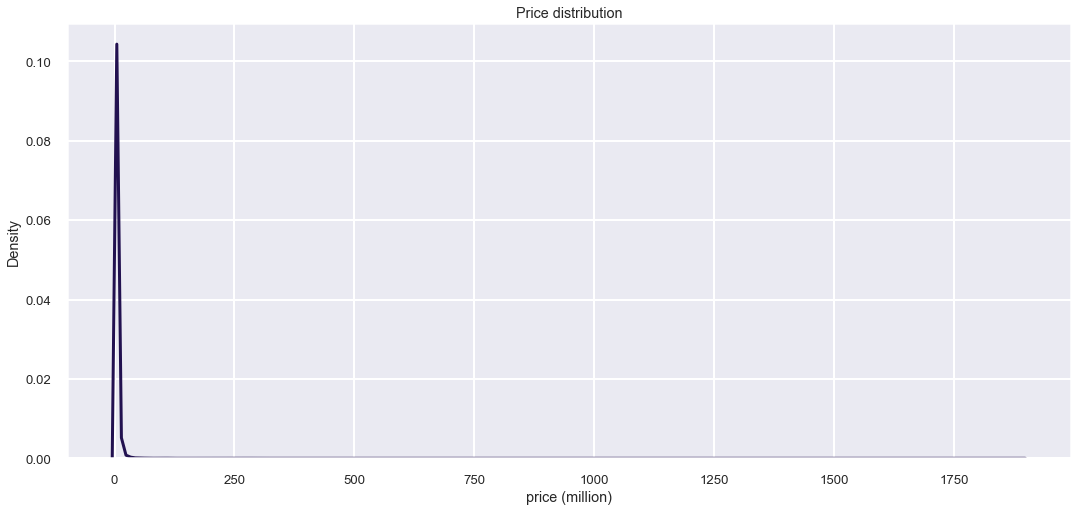

In [54]:
# price distributiion has a bad right skewness
sns.set_style('darkgrid')
dist = sns.kdeplot(df_copy['price (million)'])
dist.set_title('Price distribution')

<AxesSubplot:xlabel='price (million)'>

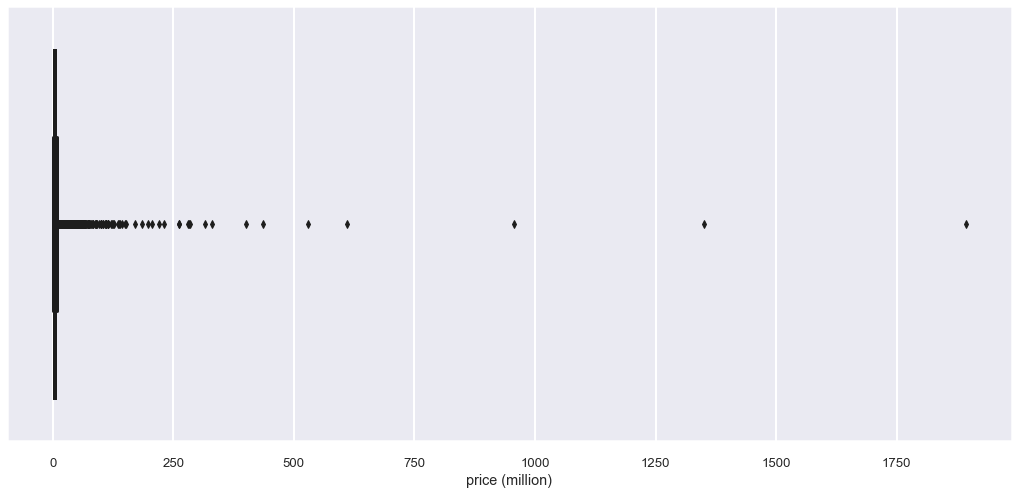

In [55]:
# detecting price outliers and handle it
sns.boxplot(df_copy['price (million)'])

In [56]:
# take a look at the data wich contain the price outliers
df_outliers = df_copy.iloc[fs.get_out_liers(df_copy, 'price (million)')]
df_outliers

price (million)    geo_lat    geo_lon  region building_type  level  \
13           10.300000  59.976200  30.316340  2661.0    Monolithic    1.0   
28            9.514531  59.857730  30.153560  2661.0    Monolithic   15.0   
35           23.000000  45.060223  39.001256  2843.0         Other   10.0   
52           15.000000  55.690547  37.721642     3.0         Brick   10.0   
69           12.380851  59.982522  30.322105  2661.0         Brick    7.0   
...                ...        ...        ...     ...           ...    ...   
49951        13.500000  55.017756  83.003578  9654.0         Panel    9.0   
49965        10.915338  59.962435  30.405062  2661.0    Monolithic    8.0   
49968        10.950000  55.806151  37.577222     3.0         Panel    1.0   
49981        22.000000  55.674651  37.496506     3.0    Monolithic    7.0   
49992        13.500000  55.747042  37.863328    81.0         Panel    1.0   

       levels  rooms    area  kitchen_area            object_type  \
13       13.0    2.0   69.20          10.9  Secondary Real Estate   
28       20.0    2.0   63.70          20.0           New Building   
35       19.0    3.0  132.90          47.0  Secondary Real Estate   
52       12.0    2.0   50.00           8.0  Secondary Real Estate   
69       14.0    2.0   74.20          22.3           New Building   
...       ...    ...     ...           ...                    ...   
49951    10.0    1.0   33.86           5.0           New Building   
49965    14.0    2.0   81.30          14.4           New Building   
49968     5.0    2.0   53.00           9.0  Secondary Real Estate   
49981    14.0    3.0   77.60          10.6  Secondary Real Estate   
49992    16.0    3.0   72.00          10.0  Secondary Real Estate   

                  Datetime  
13     2019-10-11 12:55:10  
28     2019-02-08 18:34:06  
35     2020-03-20 13:31:55  
52     2021-04-11 11:23:00  
69     2020-12-18 12:10:16  
...                    ...  
49951  2018-09-15 06:31:43  
49965  2019-07-02 08:32:30  
49968  2020-11-30 11:37:02  
49981  2021-02-19 18:18:47  
49992  2020-06-09 12:54:12  

[3881 rows x 12 columns]

In [57]:
mean_price = df_outliers['price (million)'].mean()
mean_price

18.91109031615565

## according to have a large amount of outlier data so i will drop the data less than the average of the outlier prices

In [58]:
df_copy = df_copy[df_copy['price (million)'] < mean_price]

### after searching about the average price in russia  i found that its more than 500K rubels so am gonna drop the data less than 500K

In [59]:
df_copy = df_copy[df_copy['price (million)'] >= 0.5]

In [60]:
df_copy

price (million)    geo_lat    geo_lon  region building_type  level  \
0             4.999999  59.958459  30.215529  2661.0         Brick    8.0   
1             2.150000  45.072674  41.936996  2900.0         Brick    5.0   
2             8.600000  59.939359  30.437068  2661.0    Monolithic   11.0   
3             5.100000  59.740478  30.569539  2661.0         Panel    2.0   
4             3.470000  56.324063  44.005391  2871.0    Monolithic   11.0   
...                ...        ...        ...     ...           ...    ...   
49990         7.093280  55.916540  37.710144    81.0         Panel   11.0   
49991         3.600000  45.061372  38.962089  2843.0         Other   13.0   
49992        13.500000  55.747042  37.863328    81.0         Panel    1.0   
49993         1.470000  49.935245  40.559080  2072.0    Monolithic    1.0   
49994         4.150000  56.786544  60.651328  6171.0    Monolithic   24.0   

       levels  rooms   area  kitchen_area            object_type  \
0        13.0    1.0  36.00          7.20  Secondary Real Estate   
1         5.0    1.0  52.00         15.00  Secondary Real Estate   
2        22.0    1.0  37.10          9.80  Secondary Real Estate   
3         9.0    3.0  74.50          9.50  Secondary Real Estate   
4        26.0    2.0  54.00          8.00           New Building   
...       ...    ...    ...           ...                    ...   
49990    25.0    3.0  68.80         12.40           New Building   
49991    24.0    1.0  40.63         11.00  Secondary Real Estate   
49992    16.0    3.0  72.00         10.00  Secondary Real Estate   
49993     5.0    NaN  36.40          8.50  Secondary Real Estate   
49994    25.0    2.0  48.11          8.87           New Building   

                  Datetime  
0      2018-10-20 22:11:49  
1      2019-08-23 16:39:54  
2      2021-01-21 18:39:45  
3      2020-07-18 17:51:46  
4      2019-07-11 12:21:25  
...                    ...  
49990  2018-12-31 08:58:26  
49991  2020-03-11 05:45:23  
49992  2020-06-09 12:54:12  
49993  2019-02-21 07:20:04  
49994  2020-11-28 06:45:02  

[48291 rows x 12 columns]

Text(0.5, 1.0, 'Price distribution')

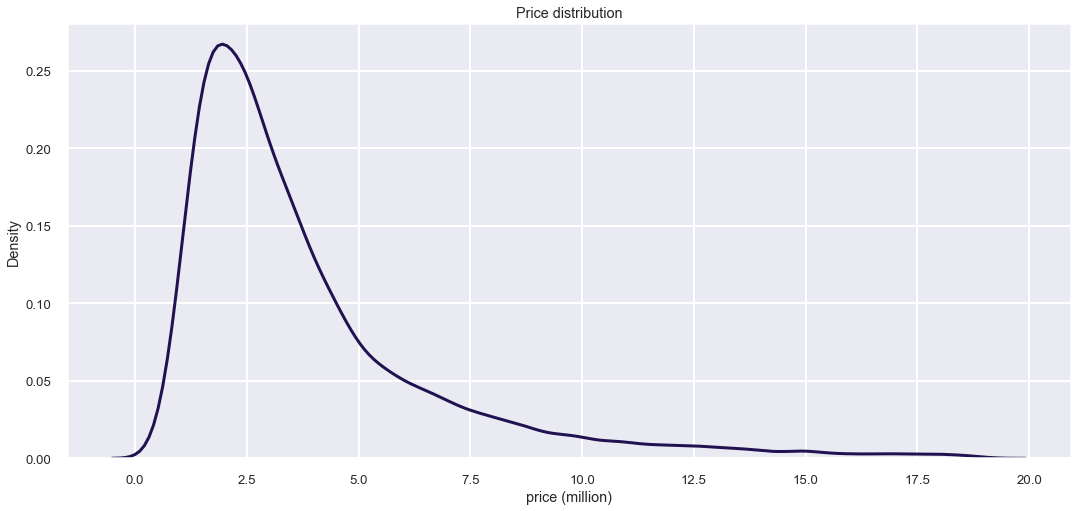

In [61]:
# now we have a better  distribution of price which still a little right skewness
sns.set_style('darkgrid') 
dist = sns.kdeplot(df_copy['price (million)'])
dist.set_title('Price distribution')

Text(0.5, 1.0, 'Price distribution')

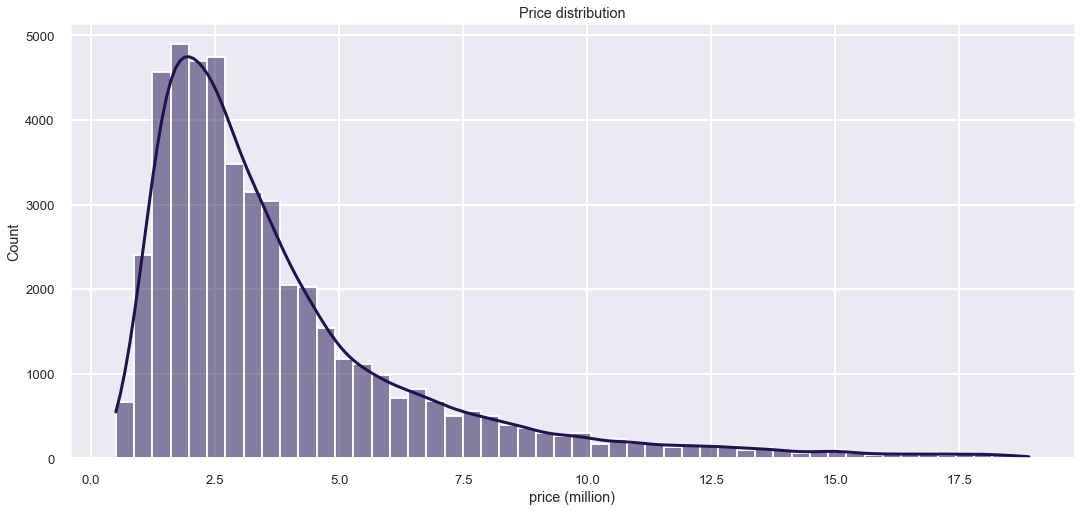

In [62]:
sns.set_style('darkgrid') 
dist = sns.histplot(df_copy['price (million)'],bins=50,kde=True)
dist.set_title('Price distribution')

In [63]:
# After Dealing with outliers
df_copy['price (million)'].describe().to_frame().T

count      mean       std  min       25%   50%   75%   max
price (million)  48291.0  3.856702  2.923682  0.5  1.939437  2.95  4.65  18.9

* 2- geo_lat, geo_lon

In [64]:
df_copy[['geo_lat', 'geo_lon']].describe().T

count       mean        std        min        25%        50%  \
geo_lat  47502.0  53.995856   4.603637  41.459089  53.361479  55.140783   
geo_lon  47963.0  53.563983  20.730751  20.138431  37.854451  43.870176   

               75%         max  
geo_lat  56.147120   69.496822  
geo_lon  73.369145  158.681668

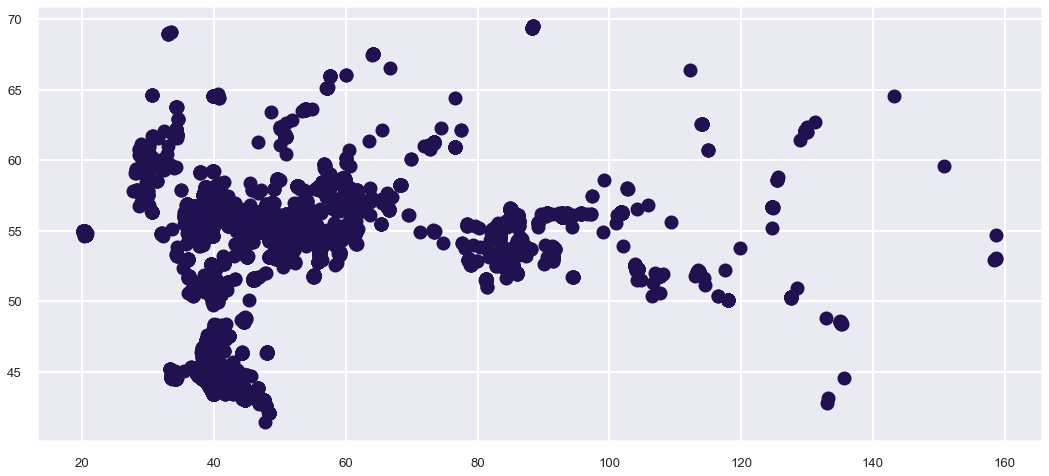

In [65]:
## distribution of houses in russia in scatter plot
plt.scatter(x=df_copy['geo_lon'], y=df_copy['geo_lat'])
plt.show()

### Houses places (distribution) in russia on map

In [72]:
import geopandas as gpd
import folium
from folium import plugins
from shapely.geometry import Point,Polygon
from folium.plugins import FastMarkerCluster
my_map = folium.Map(location=[df_copy[df_copy['geo_lat']> 0]["geo_lat"].mean(), df_copy[df_copy['geo_lon']> 0]["geo_lon"].mean()],zoom_start = 4.4) # taking data without any nan values just to make the function works
my_map.add_child(FastMarkerCluster(df_copy[(df_copy['geo_lat']> 0) & df_copy['geo_lon'] > 0][['geo_lat', 'geo_lon']].values.tolist()))
my_map

 * 3- region

In [73]:
df_copy.region.describe().to_frame().T

count         mean          std  min     25%     50%     75%  \
region  47569.0  4358.012992  3316.890787  3.0  2661.0  2922.0  6171.0   

            max  
region  16705.0

In [74]:
df_copy['region'].value_counts()

9654.0     9258
2843.0     5540
81.0       4491
2661.0     3737
3.0        3483
           ... 
4963.0        3
14880.0       3
16705.0       1
13913.0       1
69.0          1
Name: region, Length: 82, dtype: int64

#### region has 80 region codes but after lookin in the internet about this codes and i found nothing so am gonna drop this column

In [75]:
df_copy.drop(columns=['region'],inplace=True)

* 4- building_type

In [76]:
x = df_copy.building_type.value_counts().to_frame('count').T
x

Panel  Brick  Monolithic  Other  Blocky  Wooden
count  17210  16456        9574   2657    1470     119

<AxesSubplot:xlabel='building_type', ylabel='count'>

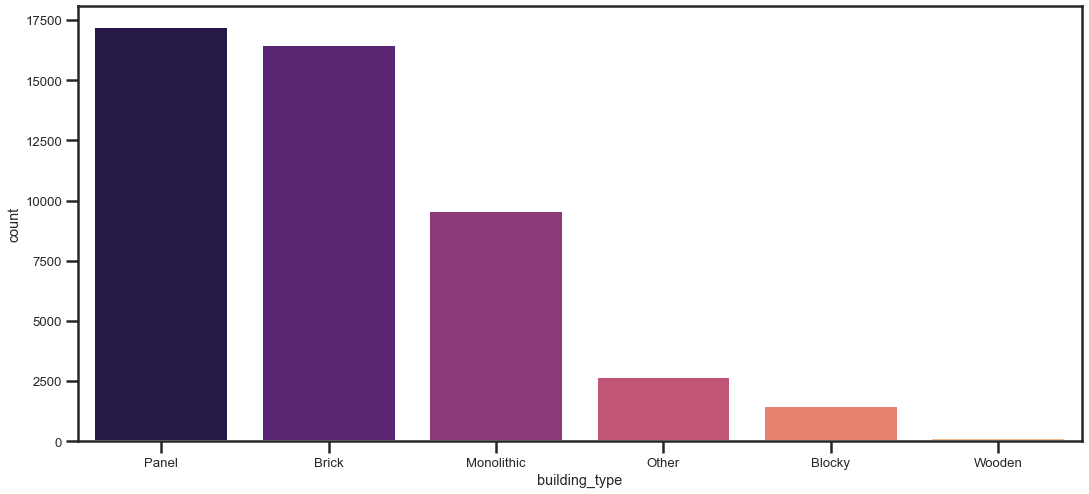

In [77]:
sns.set_style('ticks')
sns.countplot(df_copy['building_type'], order=x.columns)

* 5- level

In [78]:
df_copy.level.describe().to_frame().T

count      mean       std  min  25%  50%  75%   max
level  47426.0  6.184582  4.899488  1.0  2.0  5.0  9.0  35.0

In [79]:
x = df_copy.level.value_counts().to_frame('count')
x

count
2.0    6015
1.0    5927
3.0    5351
4.0    4915
5.0    4875
6.0    2913
8.0    2704
9.0    2652
7.0    2624
10.0   2033
12.0   1055
11.0    993
14.0    879
13.0    859
15.0    755
16.0    645
17.0    558
18.0    325
19.0    291
20.0    214
21.0    183
22.0    178
23.0    152
24.0    126
25.0    107
26.0     23
27.0     13
28.0     13
29.0     12
30.0     11
31.0     11
32.0      9
33.0      3
35.0      2

<AxesSubplot:xlabel='level', ylabel='count'>

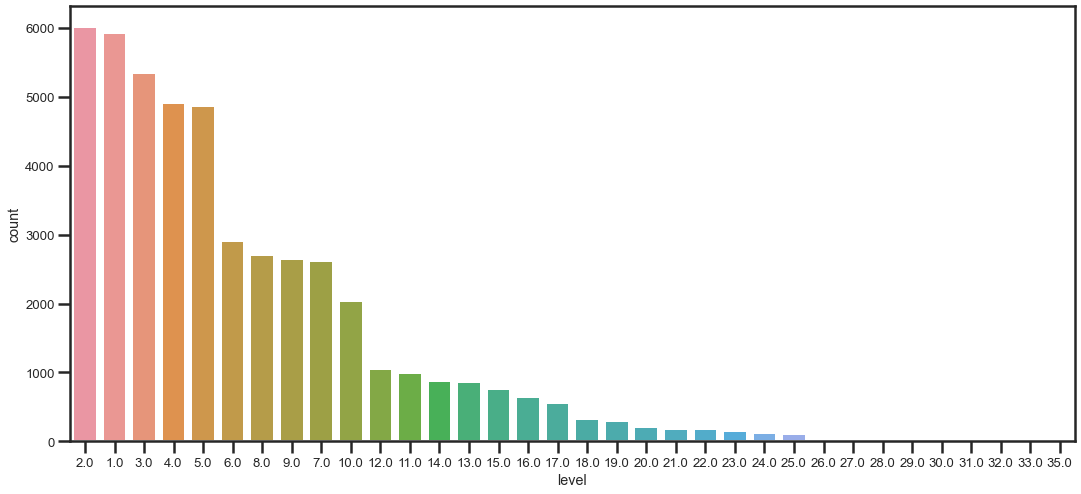

In [80]:
sns.countplot(df_copy['level'], order= x.index)

* 6- levels

In [81]:
df_copy.levels.describe().to_frame().T

count       mean       std  min  25%   50%   75%   max
levels  47900.0  11.367724  6.472935  1.0  5.0  10.0  16.0  39.0

In [82]:
y = df_copy.levels.value_counts().to_frame('count')
y

count
5.0    8855
10.0   8374
9.0    6440
17.0   3051
16.0   2744
25.0   1930
12.0   1449
18.0   1448
4.0    1438
3.0    1404
14.0   1298
19.0   1017
2.0    1014
6.0     973
24.0    846
22.0    711
8.0     603
15.0    594
20.0    571
13.0    503
7.0     477
23.0    440
11.0    430
21.0    294
26.0    267
1.0     190
33.0    140
27.0    130
32.0     69
30.0     45
31.0     41
28.0     32
29.0     29
35.0     20
36.0     10
37.0      9
39.0      6
34.0      5
38.0      3

<AxesSubplot:xlabel='levels', ylabel='count'>

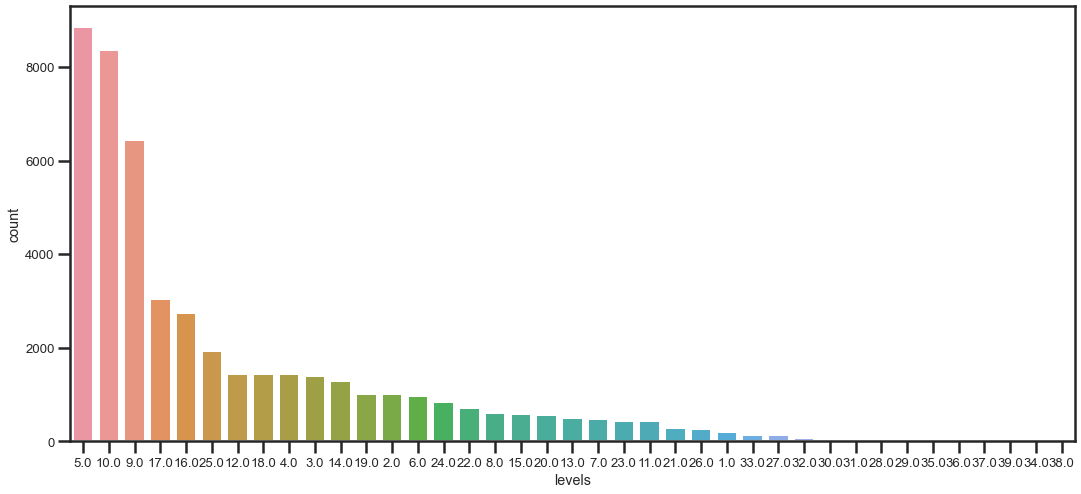

In [83]:
sns.countplot(df_copy['levels'], order= y.index)

* 7- rooms

In [84]:
df_copy.rooms.describe().to_frame().T

count      mean      std  min  25%  50%  75%  max
rooms  48082.0  1.701988  1.06742 -2.0  1.0  2.0  2.0  9.0

### As the data describtion said that -1 is studio so the least value accepted is -1 we will sub -2 with -1

In [85]:
below = df_copy[df_copy['rooms'] < -1].index

In [86]:
fs.substitute(df_copy, 'rooms', below, -1)

In [87]:
df_copy.rooms.describe().to_frame().T

count     mean       std  min  25%  50%  75%  max
rooms  48082.0  1.70203  1.067295 -1.0  1.0  2.0  2.0  9.0

In [88]:
x = df_copy.rooms.value_counts().to_frame('Count Of rooms')
x

Count Of rooms
 1.0           18398
 2.0           16135
 3.0            9462
-1.0            2752
 4.0            1173
 5.0             138
 6.0              19
 7.0               3
 9.0               2

In [89]:
fig = px.pie(df_copy[~df_copy.rooms.isnull()], names='rooms',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

* 8- kitchen_area

In [90]:
df_copy.kitchen_area.describe().to_frame().T

count       mean       std   min  25%  50%   75%     max
kitchen_area  47969.0  10.445158  5.362539  0.06  7.0  9.5  12.3  187.17

<AxesSubplot:xlabel='kitchen_area', ylabel='Density'>

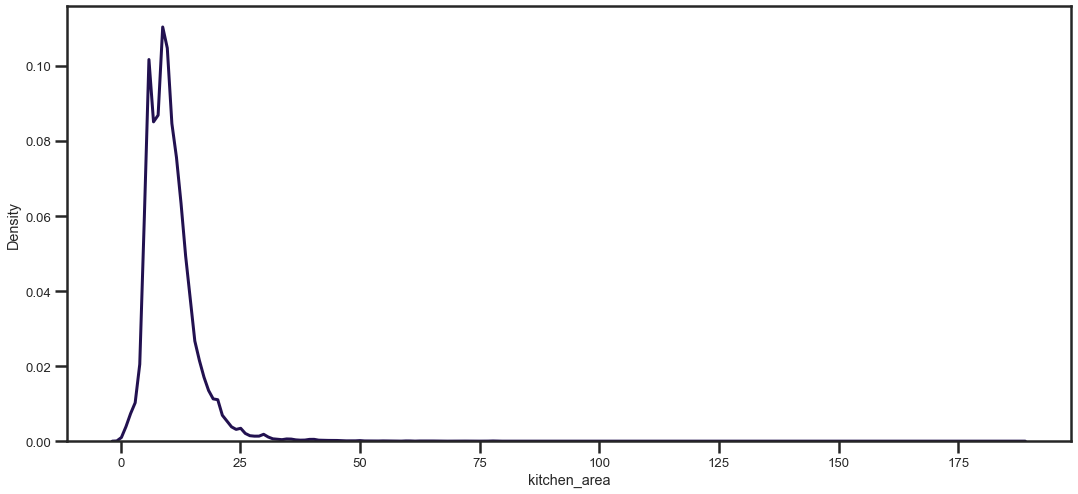

In [91]:
sns.kdeplot(df_copy['kitchen_area'])

* 9- area

In [92]:
df_copy.area.describe().to_frame().T

count       mean        std  min   25%   50%      75%     max
area  47340.0  52.920583  33.277765  3.1  38.0  48.0  62.8575  4190.0

<AxesSubplot:xlabel='area', ylabel='Density'>

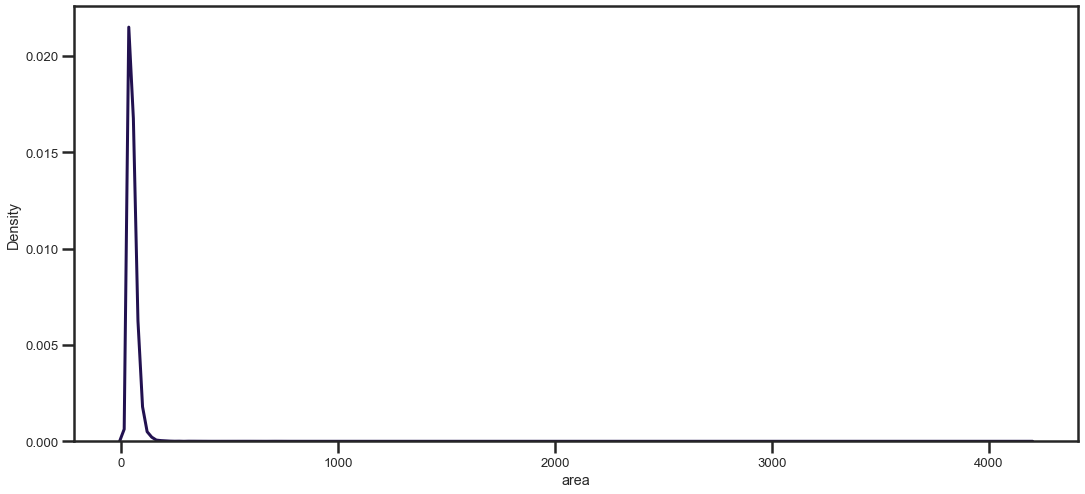

In [93]:
sns.kdeplot(df_copy['area'])

* 10- object_type

In [94]:
df_copy.object_type.value_counts().to_frame().T # Secondary Real Estate dominates the data

Secondary Real Estate  New Building
object_type                  33682         14092

In [95]:
fig = px.pie(df_copy[~df_copy.object_type.isnull()], names='object_type',color_discrete_sequence=px.colors.sequential.Burg_r, width= 700, height=700)
fig.show()

* 11- DateTime

In [96]:
df_copy.Datetime = pd.to_datetime(df_copy.Datetime)

In [97]:
x = df_copy.Datetime.dt.year.value_counts()
x

2019.0    19461
2020.0    15277
2018.0     7628
2021.0     5002
Name: Datetime, dtype: int64

<AxesSubplot:xlabel='Datetime', ylabel='count'>

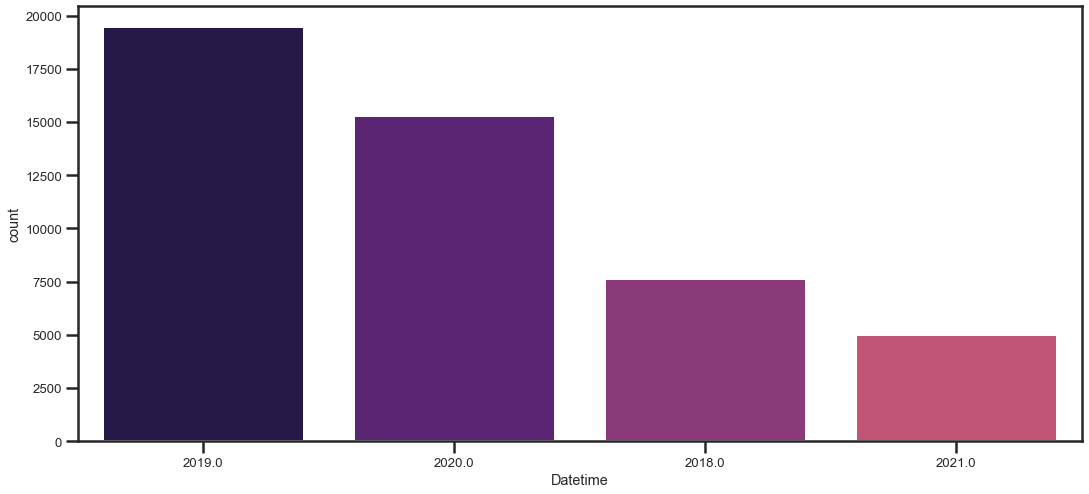

In [98]:
sns.countplot(df_copy.Datetime.dt.year,order=x.index)

<AxesSubplot:xlabel='Datetime', ylabel='count'>

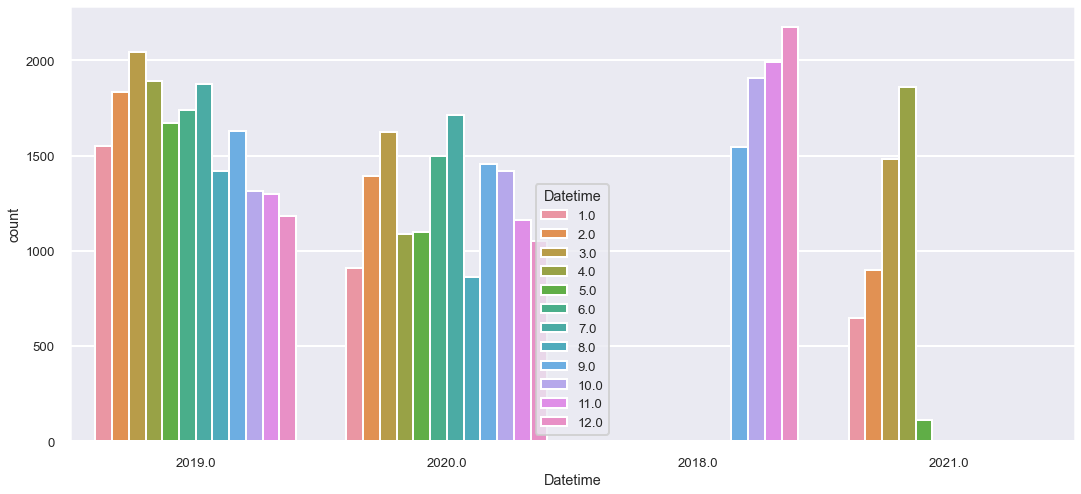

In [99]:
sns.set_style('darkgrid')
sns.countplot(df_copy.Datetime.dt.year, order=x.index, hue= df_copy.Datetime.dt.month)

In [ ]:
    df_copy.to_csv('DatafrmaeCopy.csv',index=False)

### By Anas Awad